In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

In [2]:
#importing glob for filepaths
import glob

In [35]:
# getting the file paths for z=0,0.5,1,2,3,5,10 hdf5 files
f_0 = glob.glob('*z0.hdf5')
f_0p5 = glob.glob('*z0p5.hdf5')
f_1 = glob.glob('*z1.hdf5')
f_2 = glob.glob('*z2.hdf5')
f_3 = glob.glob('*z3.hdf5')
f_5 = glob.glob('*z5.hdf5')
f_10 = glob.glob('*z10.hdf5')

In [36]:
## reading DM, Gas and All Matter 2pCF from the files

# Arrays to save the data
Master_2pCF = []

for z_path in (f_0, f_0p5, f_1, f_2, f_3, f_5, f_10):
    DM = []; Gas = []; All = []
    for name in z_path:
        f = h5.File(name, 'r')
        DM.append([f['2pCF']['DM']['r'][:], f['2pCF']['DM']['xi0'][:]])
        Gas.append([f['2pCF']['gas']['r'][:], f['2pCF']['gas']['xi0'][:]])
        All.append([f['2pCF']['all_matter']['r'][:], f['2pCF']['all_matter']['xi0'][:]])
        f.close()
    Master_2pCF.append([DM, Gas, All])

In [57]:
componets = ['DM', 'Gas', 'All matter']
z_vals = [0, 0.5, 1, 2, 3, 5, 10]

In [37]:
np.shape(Master_2pCF)

c:\Users\bipra\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(7, 3, 4, 2)

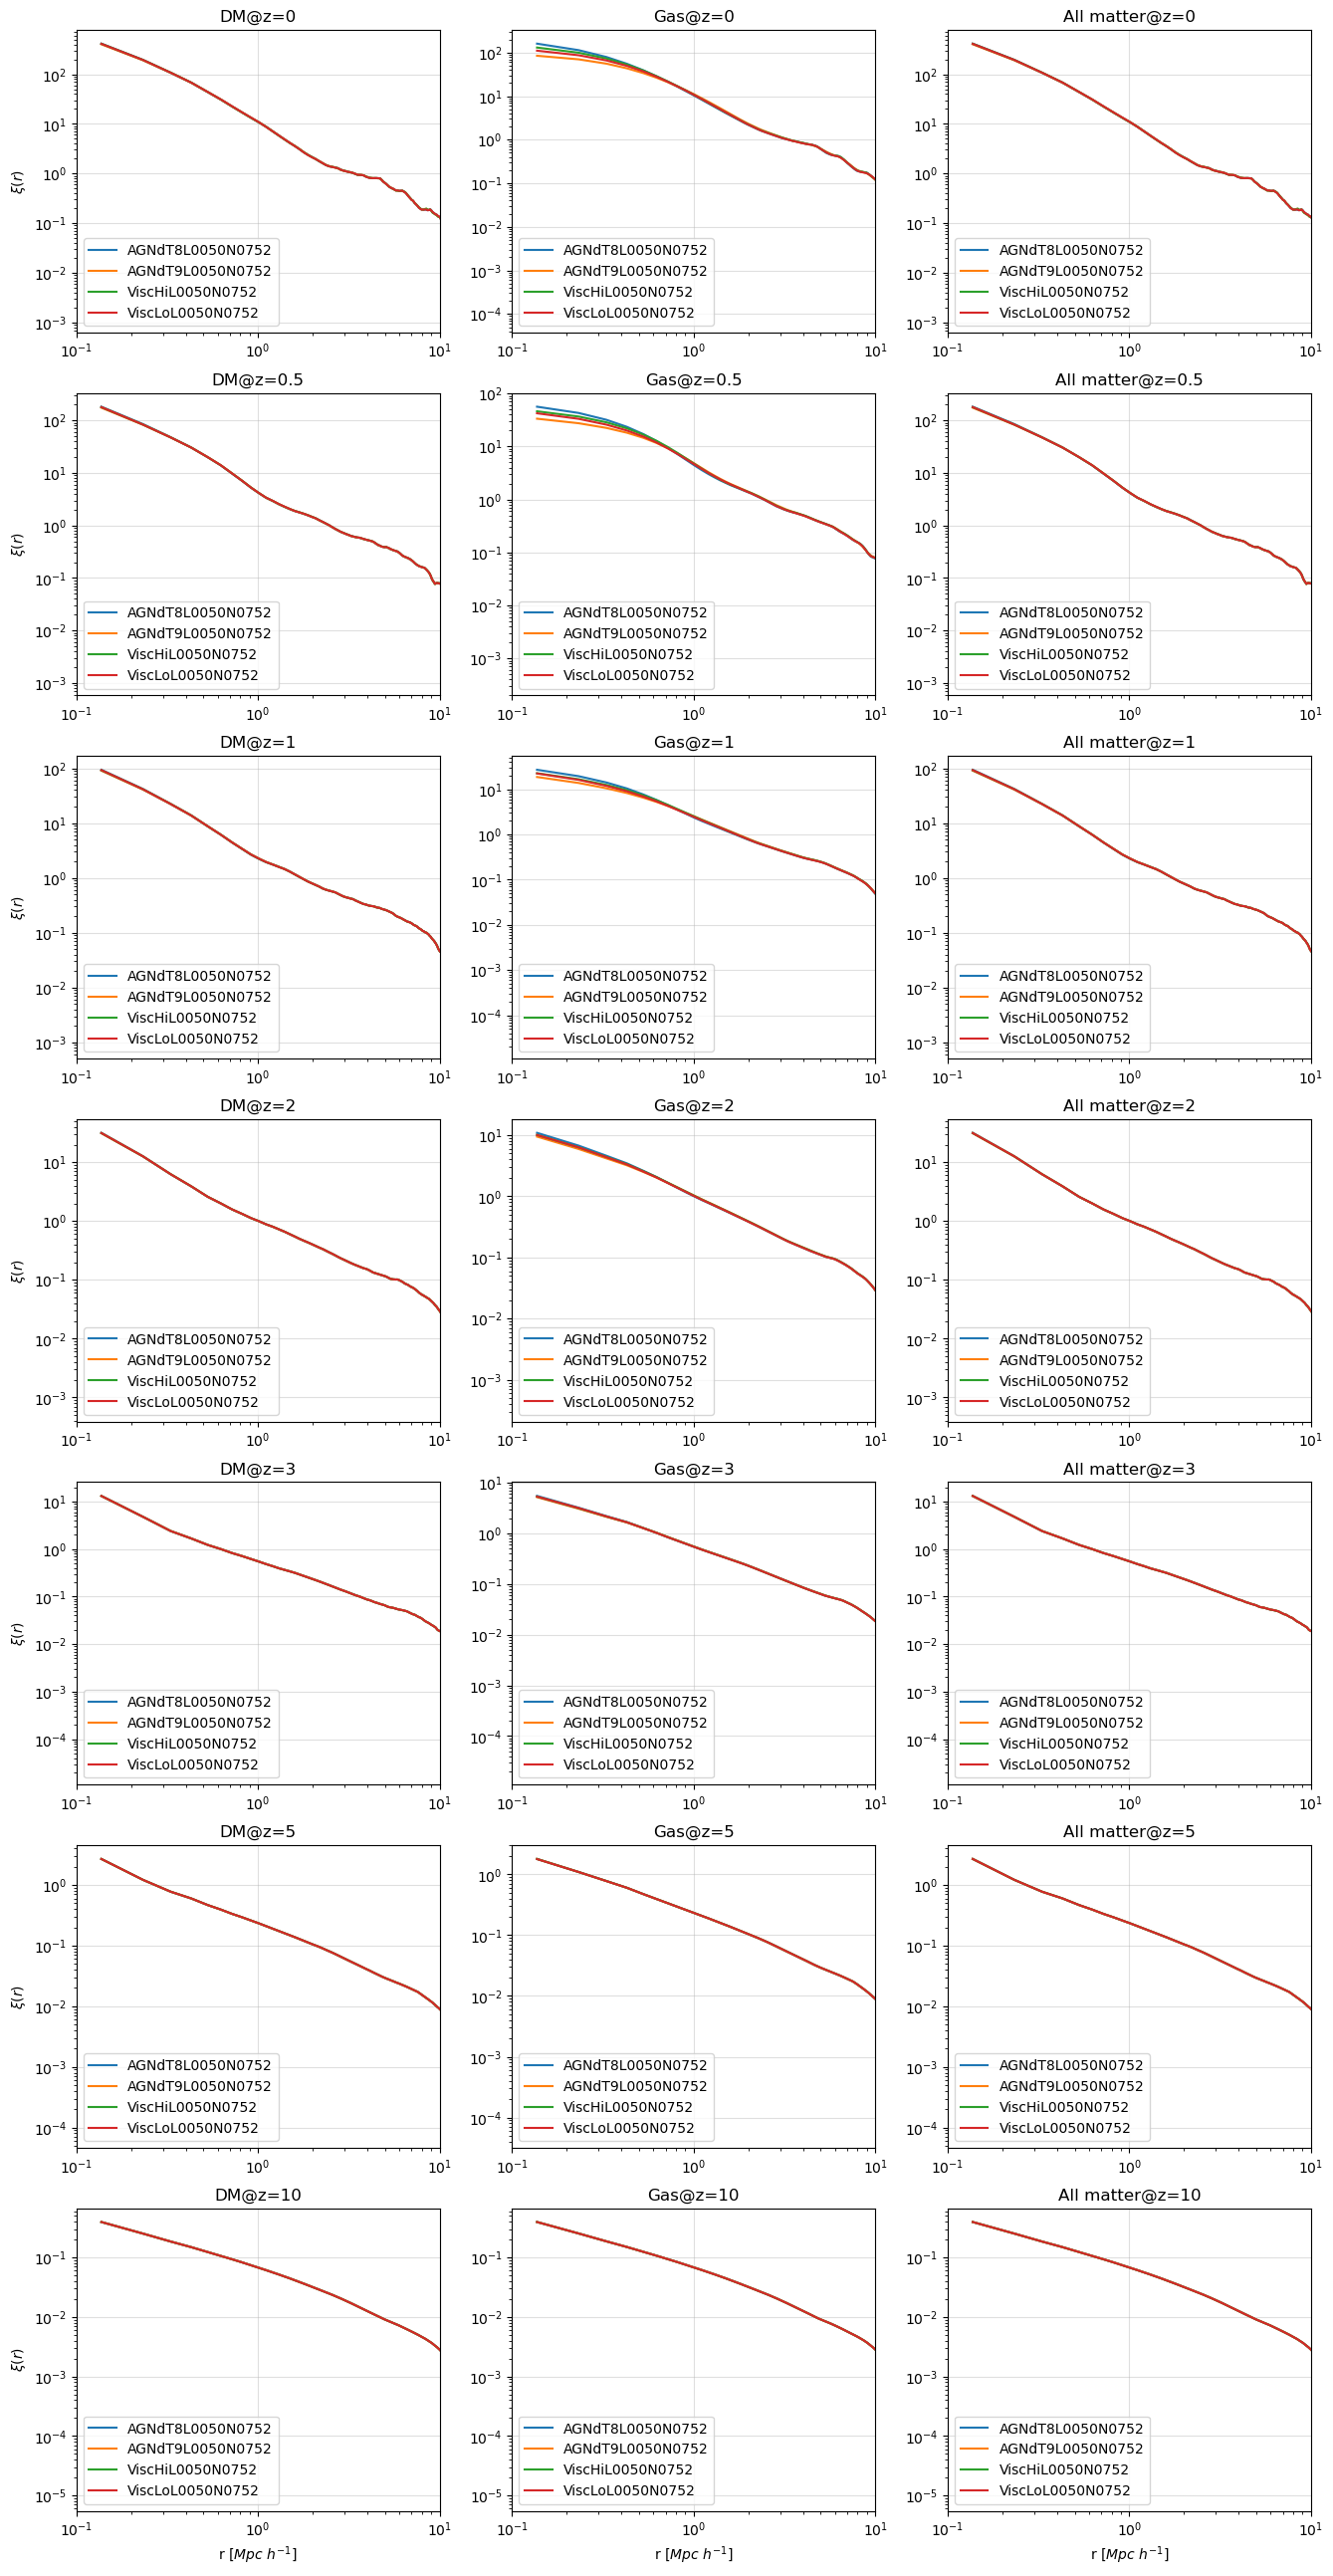

In [136]:
# plotting 2pCF at z=0 for different models and differnent components
fig, ax = plt.subplots(7, 3, figsize=(16,33), dpi=100)
# fig.suptitle('2 point Correlation Function at z=0')

for z in range(7):
    ax[z,0].set_ylabel('$\\xi (r)$')
    for i in range(3):
        for j in range(len(f_0)):
            ax[z,i].loglog(Master_2pCF[z][i][j][0],Master_2pCF[z][i][j][1], label=f_0[j].split('_')[0])
            ax[z,i].legend()
            ax[z,i].set_xlim(1e-1, 1e1);
            ax[z,i].set_title(componets[i] + '@z=' + str(z_vals[z]))
        if z==6:
            ax[z,i].set_xlabel('r $[Mpc ~h^{-1}]$')
        ax[z,i].grid(alpha=0.4)
plt.savefig('2pCF_Master.jpg', dpi=300, bbox_inches='tight')

In [61]:
## Reading DM, Gas and All Matter Power Spectrum from the files
# Arrays to save the data
Master_Pk = []

for z_path in (f_0, f_0p5, f_1, f_2, f_3, f_5, f_10):
    DM = []; Gas = []; All = []
    for name in z_path:
        f = h5.File(name, 'r')
        DM.append( [f['Pk']['DM']['k'][:], f['Pk']['DM']['Pk0'][:]])
        Gas.append([f['Pk']['gas']['k'][:], f['Pk']['gas']['Pk0'][:]])
        All.append([f['Pk']['all_matter']['k'][:], f['Pk']['all_matter']['Pk0'][:]])
        f.close()
    Master_Pk.append([DM, Gas, All])

In [62]:
np.shape(Master_Pk)

(7, 3, 4, 2, 303)

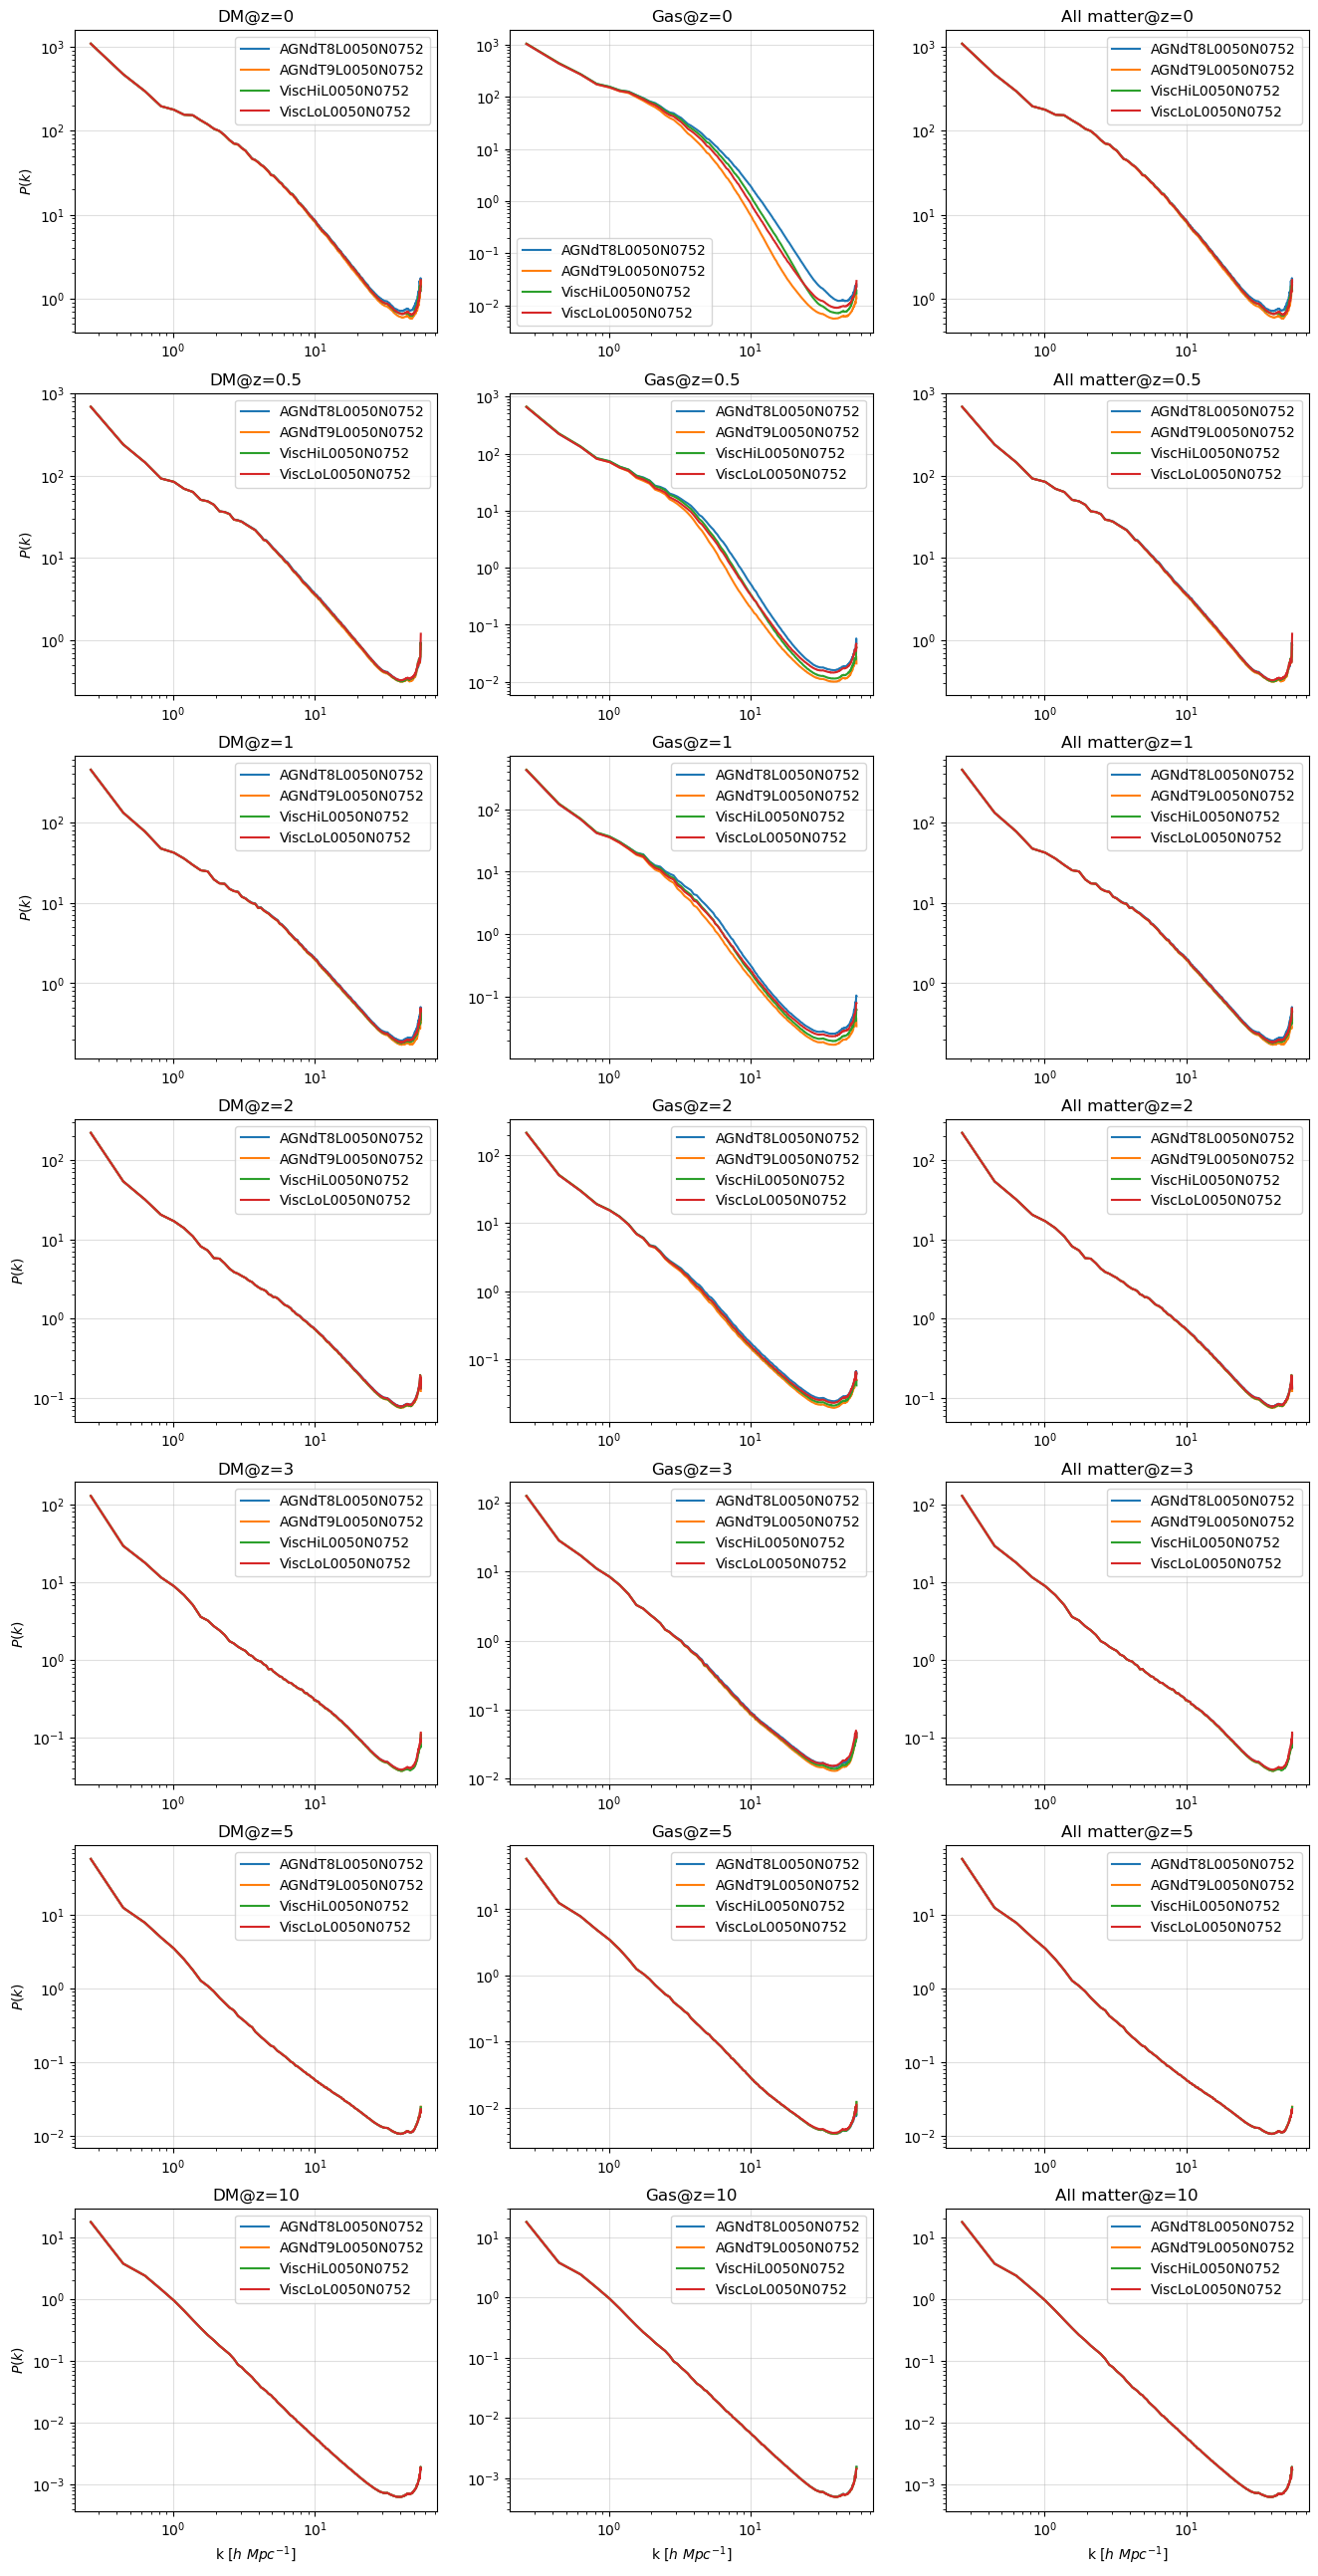

In [135]:
# plotting Pk at z=0 for different models and differnent components
fig, ax = plt.subplots(7, 3, figsize=(16,33), dpi=100)
# fig.suptitle('2 point Correlation Function at z=0')

for z in range(7):
    ax[z,0].set_ylabel('$P(k)$')
    for i in range(3):
        for j in range(len(f_0)):
            ax[z,i].loglog(Master_Pk[z][i][j][0][:-2],Master_Pk[z][i][j][1][:-2], label=f_0[j].split('_')[0])
            ax[z,i].legend()
            # ax[z,i].set_xlim(1e-1, 1e1);
            ax[z,i].set_title(componets[i] + '@z=' + str(z_vals[z]))
        if z==6:
            ax[z,i].set_xlabel('k $[h~ Mpc^{-1} ]$')
        ax[z,i].grid(alpha=0.4)
plt.savefig('Pk_Master.jpg', dpi=300, bbox_inches='tight')

In [133]:
np.shape(np.asarray(Master_2pCF, dtype=object))

(7, 3, 4, 2)

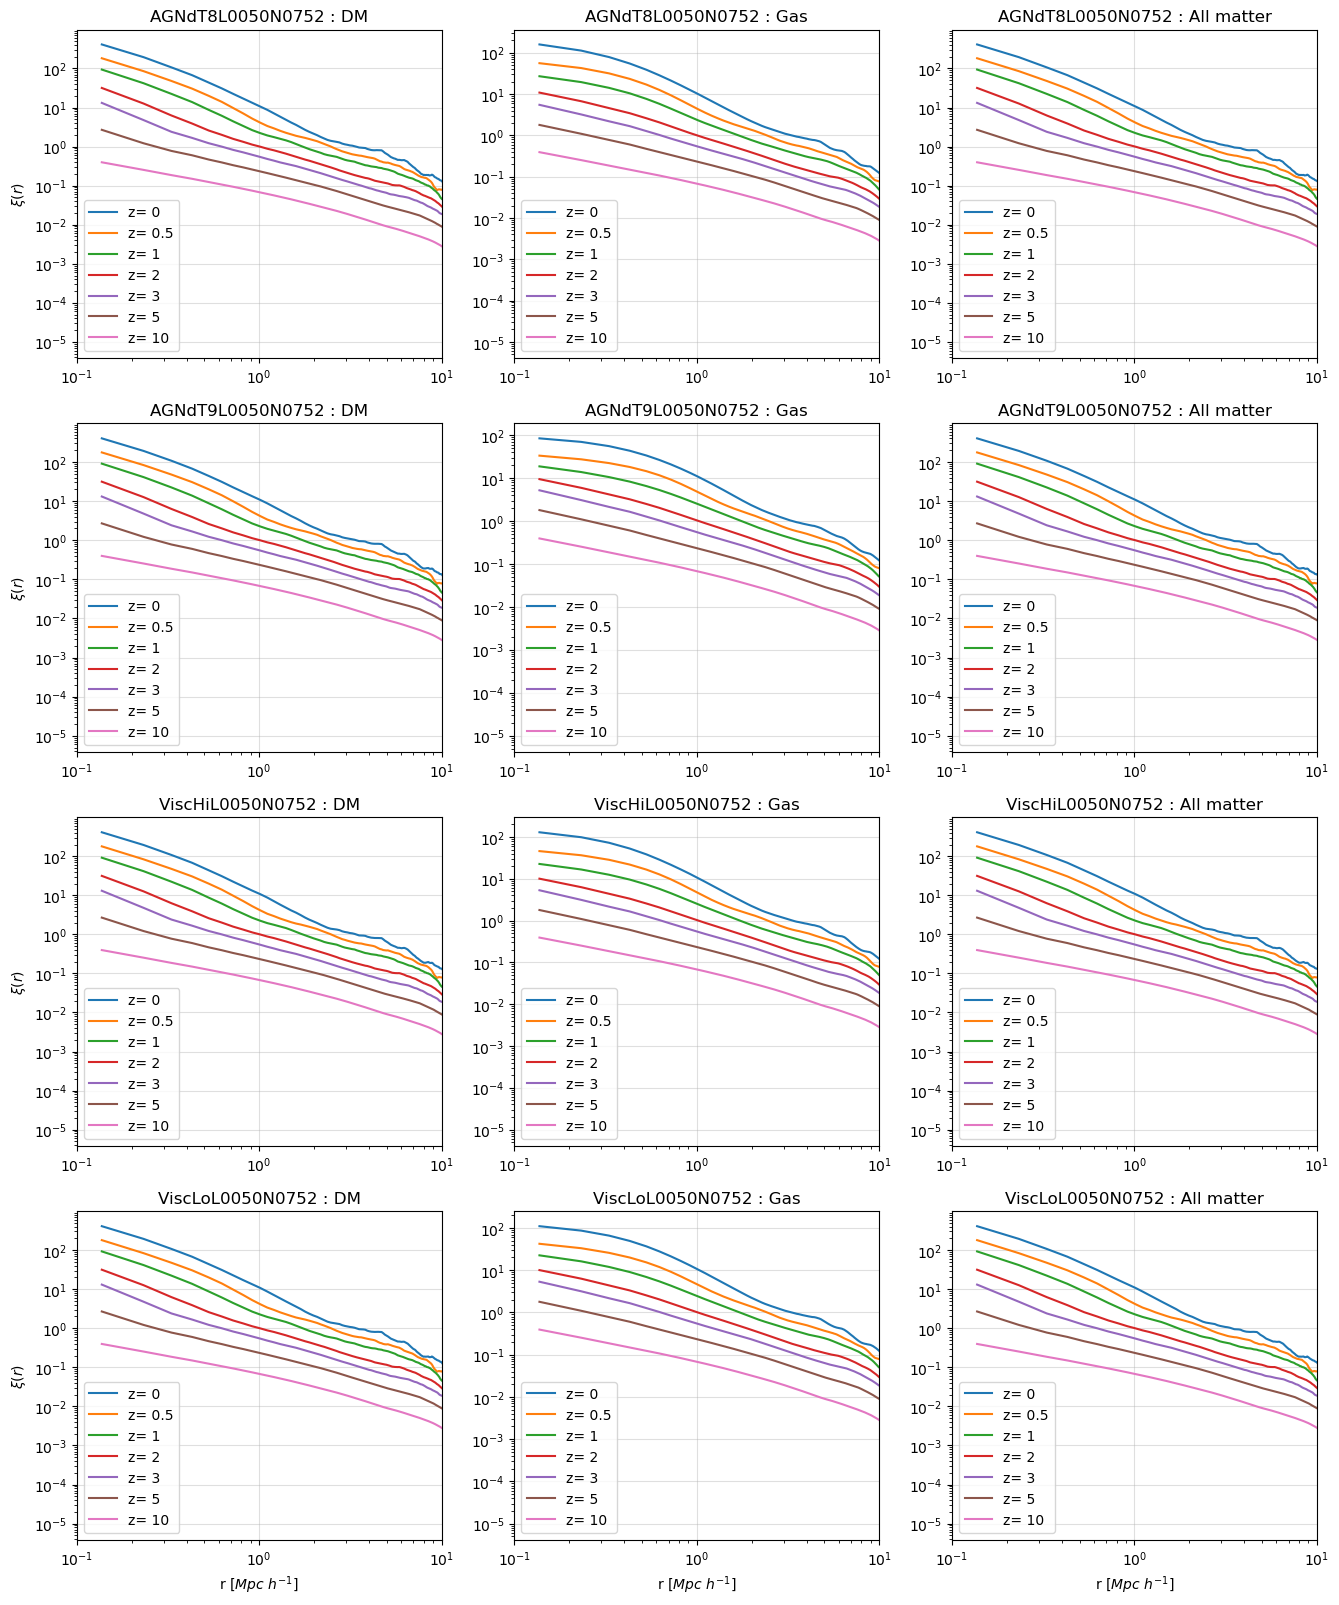

In [83]:
# Plotting the 2pCF of a particular model at different redshifts

fig, ax = plt.subplots(4,3, figsize=(16,20), dpi=100)
# fig.suptitle('2 point Correlation Function at z=0')

for i in range(4):
    ax[i,0].set_ylabel('$\\xi (r)$')
    for j in range(3):
        for z in range(7):
            ax[i,j].loglog(Master_2pCF[z][j][i][0],Master_2pCF[z][j][i][1], label='z= ' + str(z_vals[z]))
            ax[i,j].set_xlim(1e-1, 1e1);
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title(f_0[i].split('_')[0]+' : '+componets[j])
        if i==3:
            ax[i,j].set_xlabel('r $[Mpc ~h^{-1}]$')
plt.savefig('2pCF_ModelVariation.jpg', dpi=300, bbox_inches='tight')

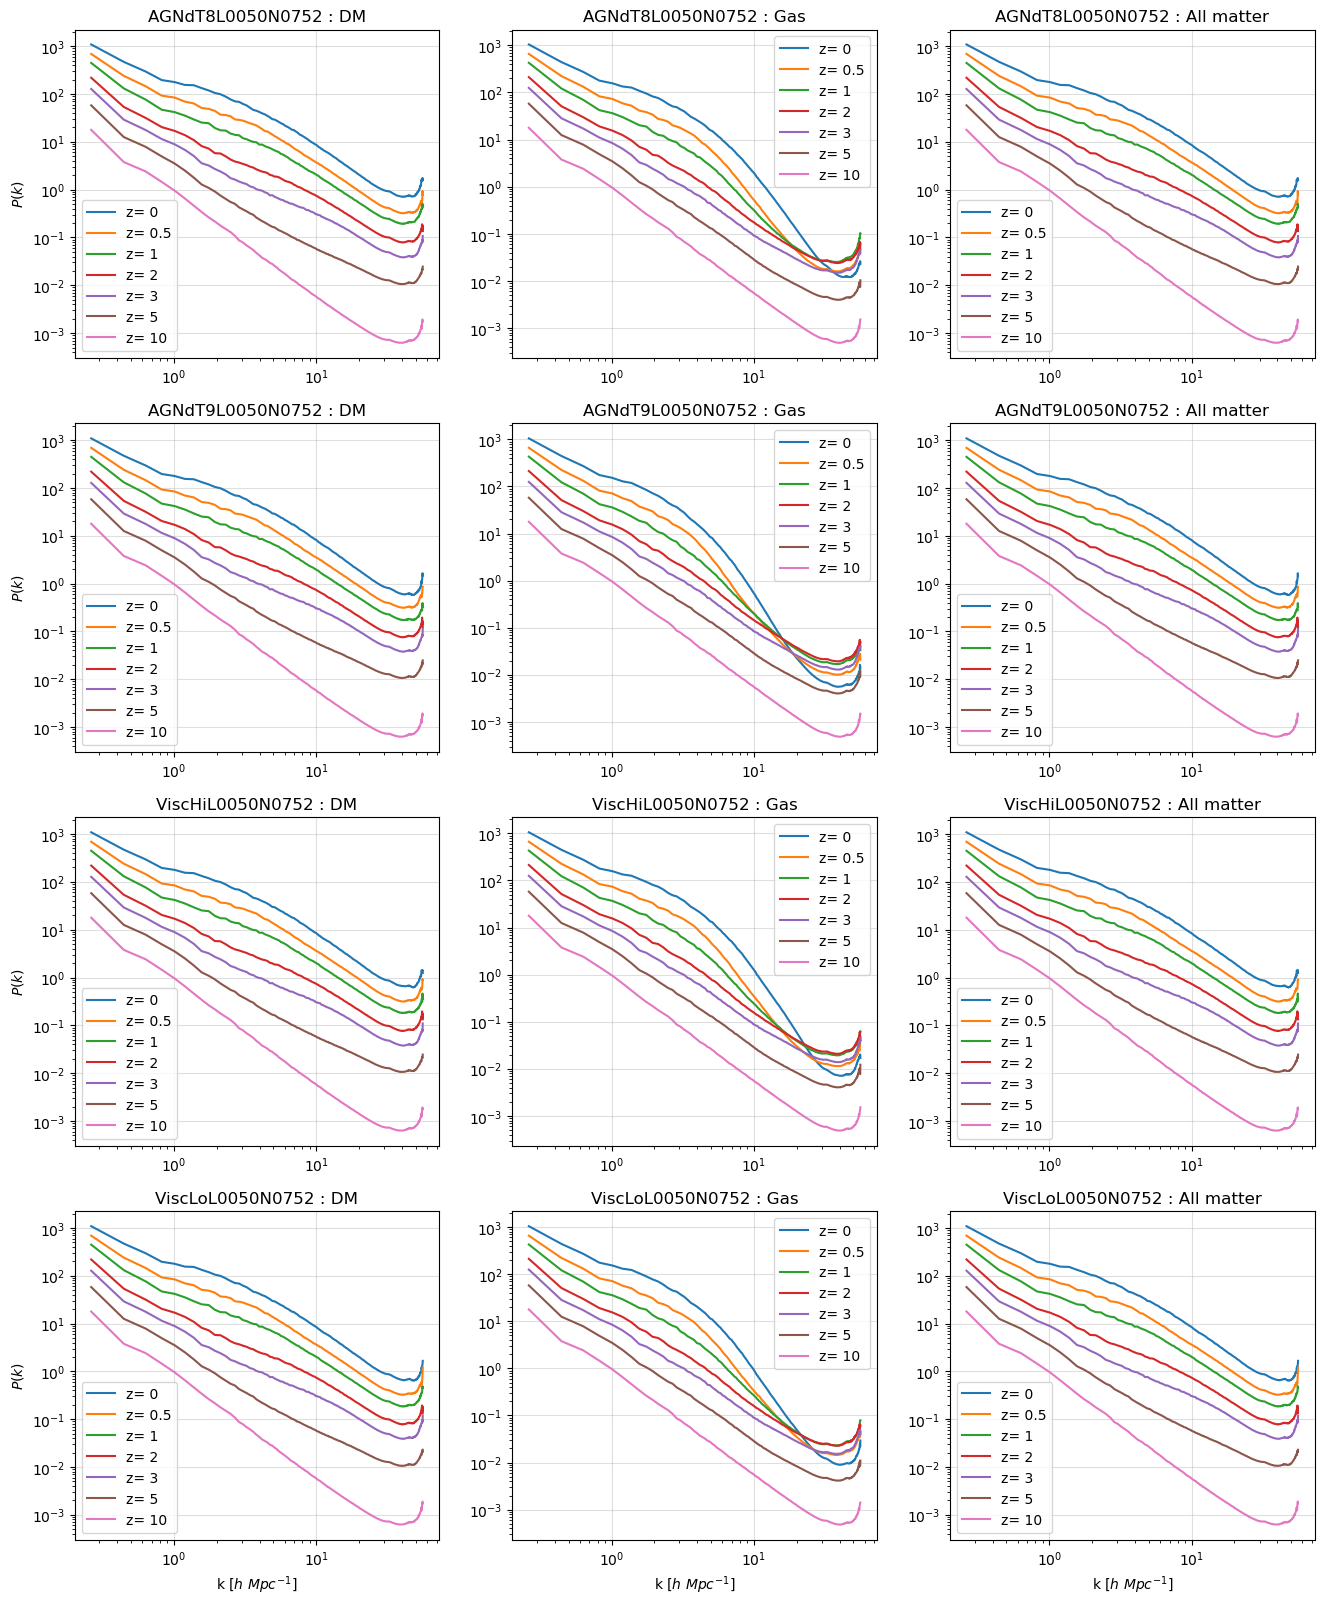

In [92]:
# Plotting the 2pCF of a particular model at different redshifts

fig, ax = plt.subplots(4,3, figsize=(16,20), dpi=100)
# fig.suptitle('2 point Correlation Function at z=0')

for i in range(4):
    ax[i,0].set_ylabel('$P(k)$')
    for j in range(3):
        for z in range(7):
            ax[i,j].loglog(Master_Pk[z][j][i][0][:-2],Master_Pk[z][j][i][1][:-2], label='z= ' + str(z_vals[z]))
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title(f_0[i].split('_')[0]+' : '+componets[j])
        if i==3:
            ax[i,j].set_xlabel('k $[h~ Mpc^{-1} ]$')
plt.savefig('Pk_ModelVariation.jpg', dpi=300, bbox_inches='tight')

Now we compare the same between AGNdT8 and AGNdT9 pair and ViscHi and ViscLo.

# Compariision for AGNdT8/dT9

In [108]:
np.shape(Master_Pk)

(7, 3, 4, 2, 303)

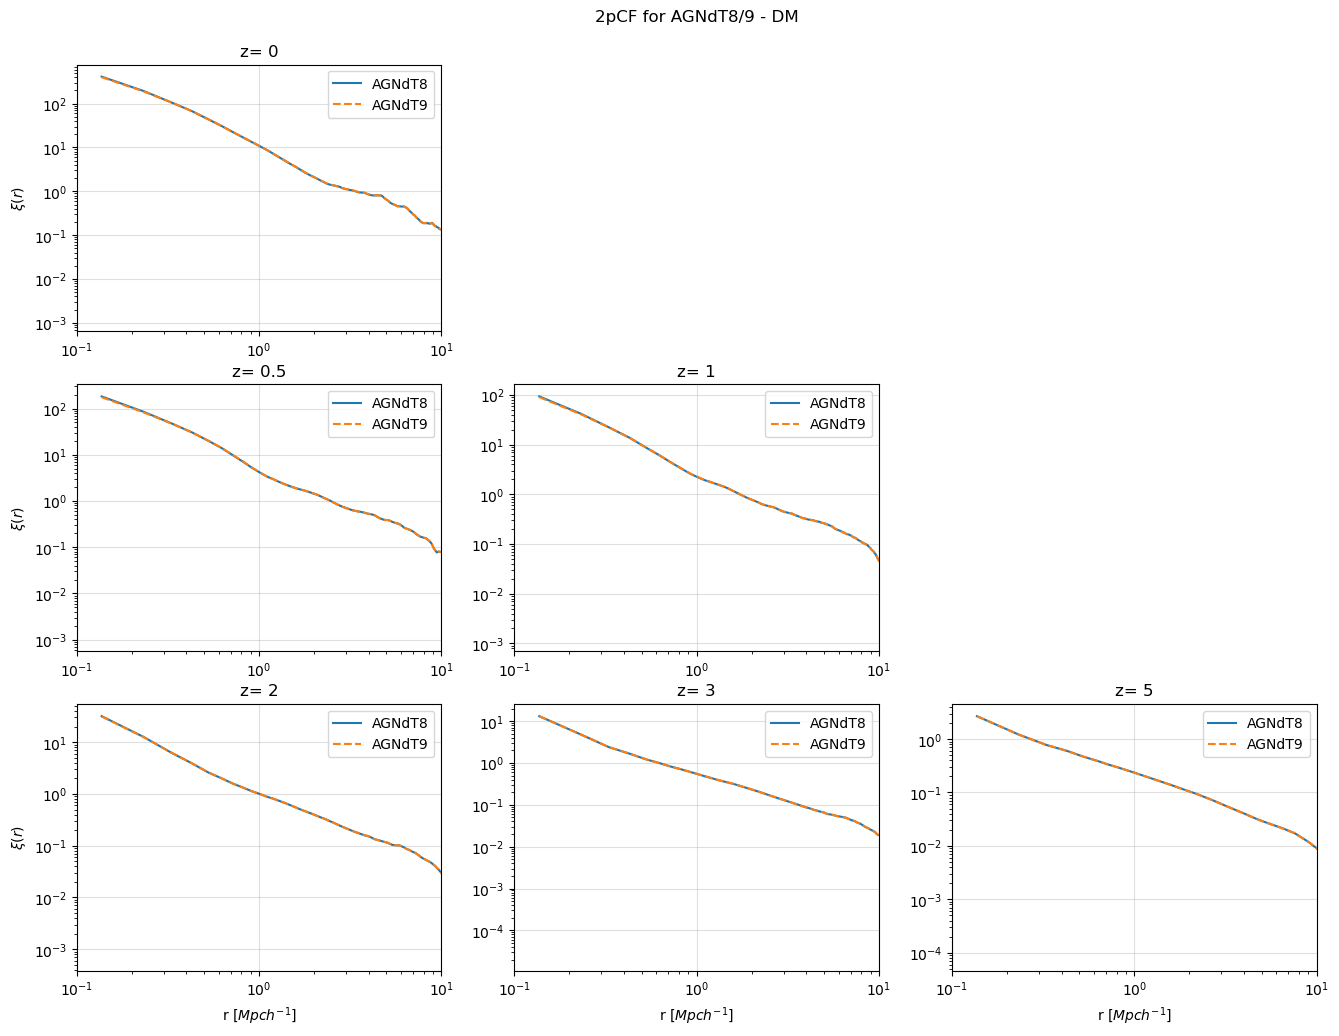

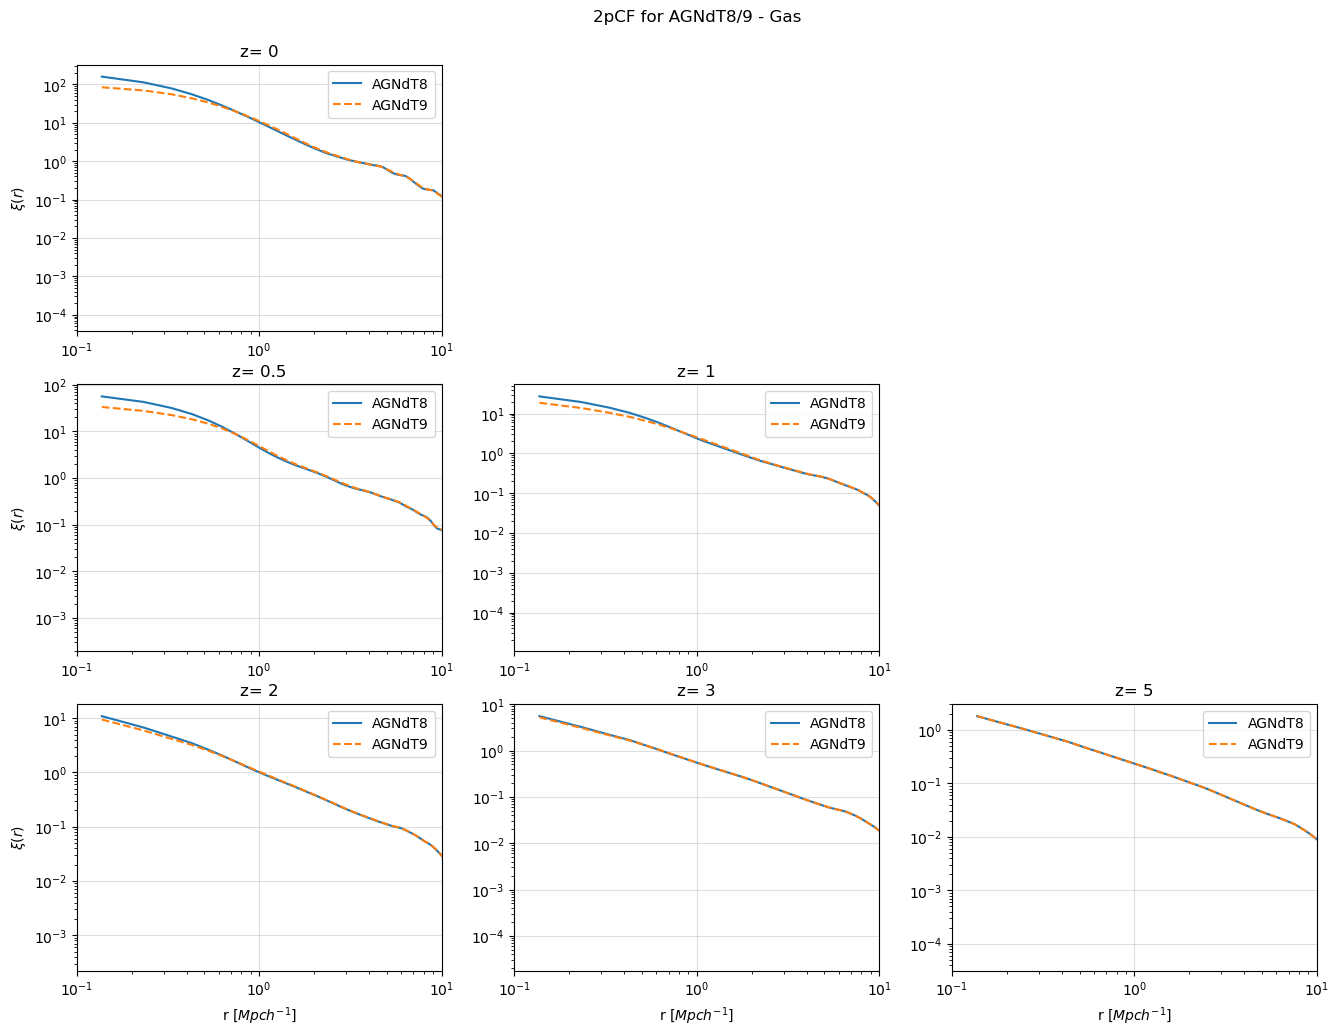

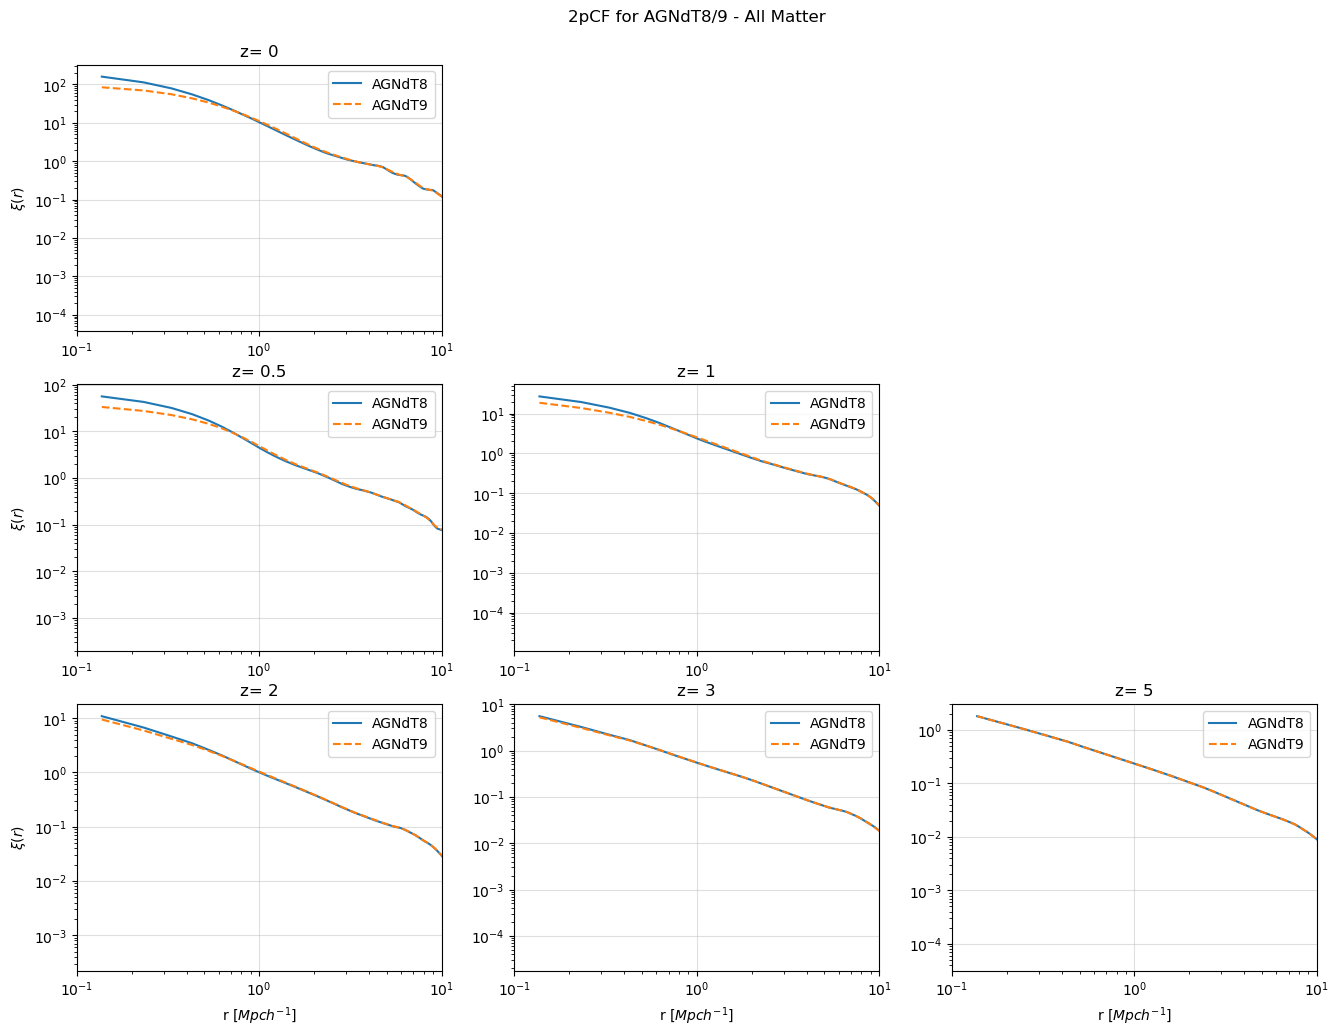

In [125]:
# creating triangular plot for 2pCF 
# DM only
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$\\xi (r)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_2pCF[z][0][0][0][:-2],Master_2pCF[z][0][0][1][:-2], label='AGNdT8')
            ax[i,j].loglog(Master_2pCF[z][0][1][0][:-2],Master_2pCF[z][0][1][1][:-2], ls='--', label='AGNdT9')
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_xlim(1e-1, 1e1);
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('r $[Mpc h^{-1} ]$')
ax[0,1].set_title('2pCF for AGNdT8/9 - DM\n\n');
plt.savefig('AGNdT8_9_2pCF_DM.jpg', dpi=300, bbox_inches='tight')

# Gas only
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$\\xi (r)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_2pCF[z][1][0][0][:-2],Master_2pCF[z][1][0][1][:-2], label='AGNdT8')
            ax[i,j].loglog(Master_2pCF[z][1][1][0][:-2],Master_2pCF[z][1][1][1][:-2], ls='--', label='AGNdT9')
            ax[i,j].legend()
            ax[i,j].set_xlim(1e-1, 1e1)
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('r $[Mpc h^{-1} ]$')
ax[0,1].set_title('2pCF for AGNdT8/9 - Gas\n\n');
plt.savefig('AGNdT8_9_2pCF_gas.jpg', dpi=300, bbox_inches='tight')

# All Matter
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$\\xi(r)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_2pCF[z][1][0][0][:-2],Master_2pCF[z][1][0][1][:-2], label='AGNdT8')
            ax[i,j].loglog(Master_2pCF[z][1][1][0][:-2],Master_2pCF[z][1][1][1][:-2], ls='--', label='AGNdT9')
            ax[i,j].legend()
            ax[i,j].set_xlim(1e-1, 1e1)
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('r $[Mpc h^{-1} ]$')
ax[0,1].set_title('2pCF for AGNdT8/9 - All Matter\n\n');
plt.savefig('AGNdT8_9_2pCF_AM.jpg', dpi=300, bbox_inches='tight')

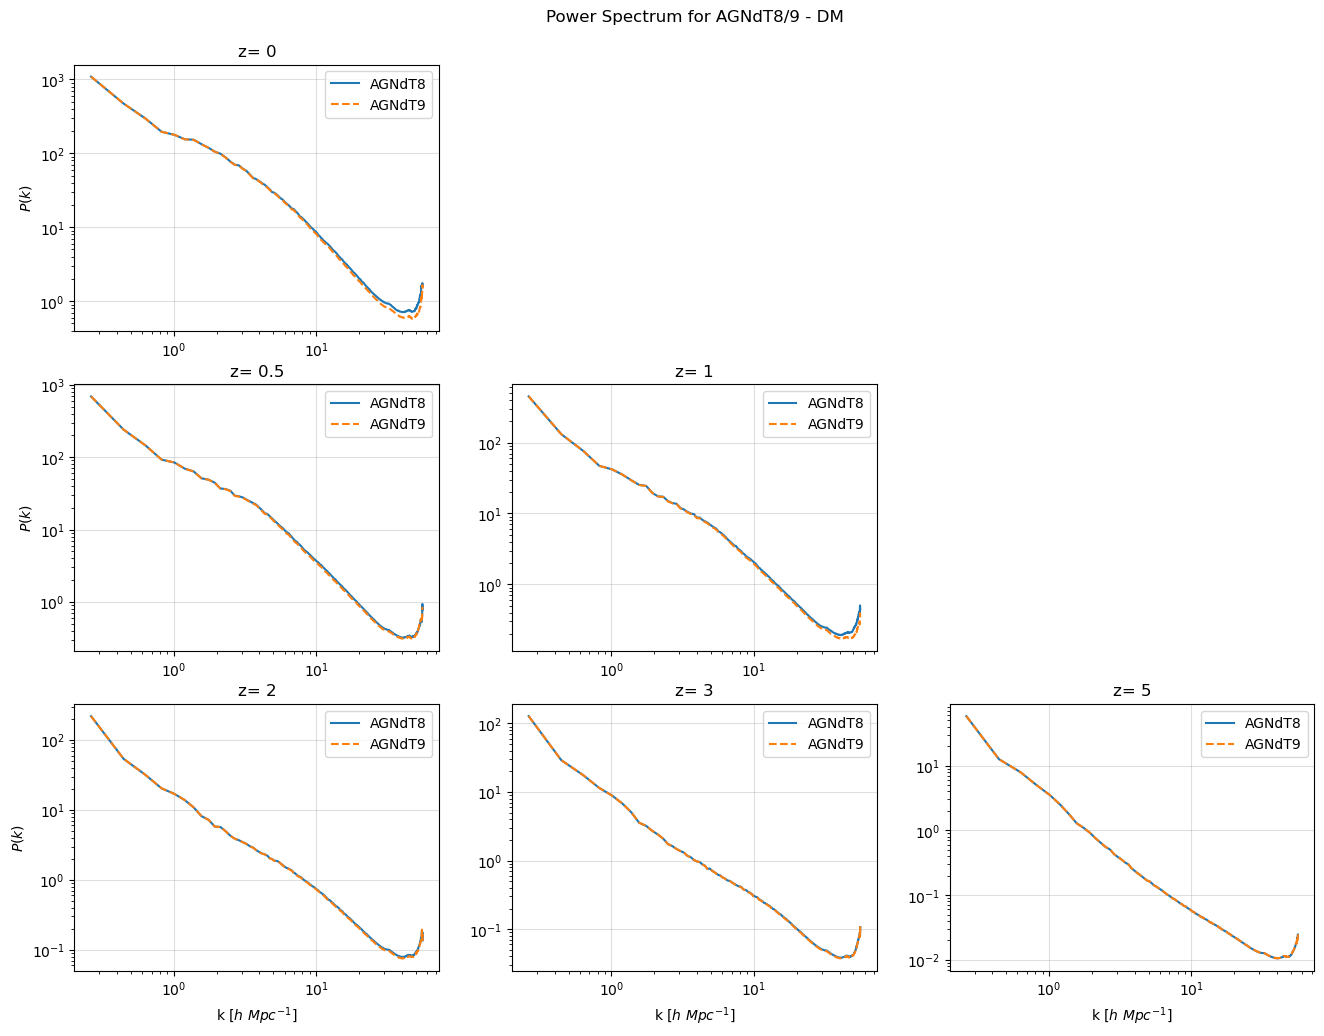

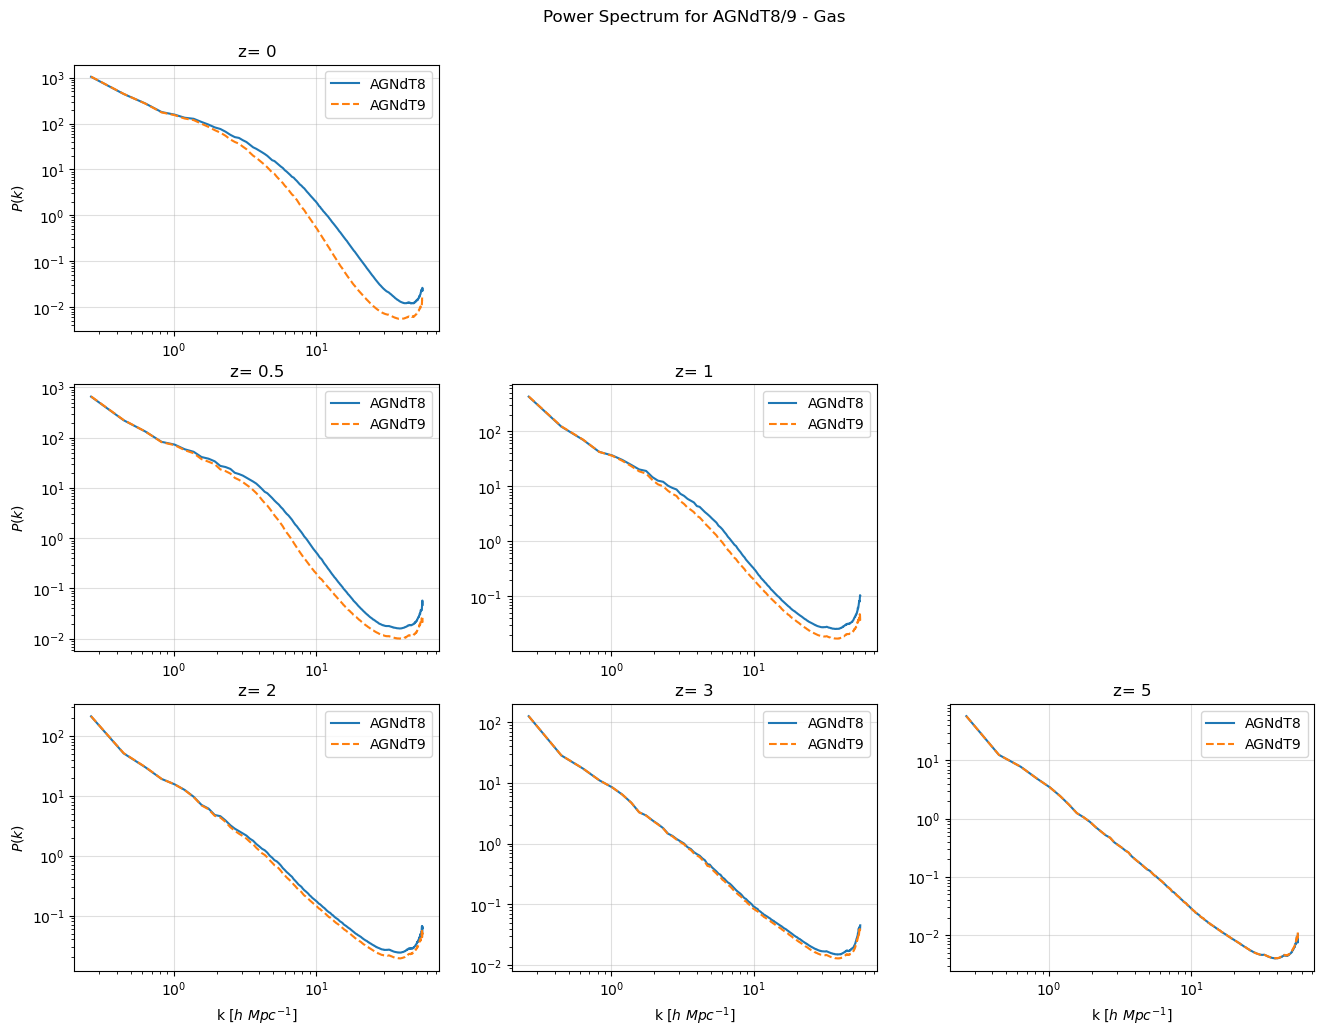

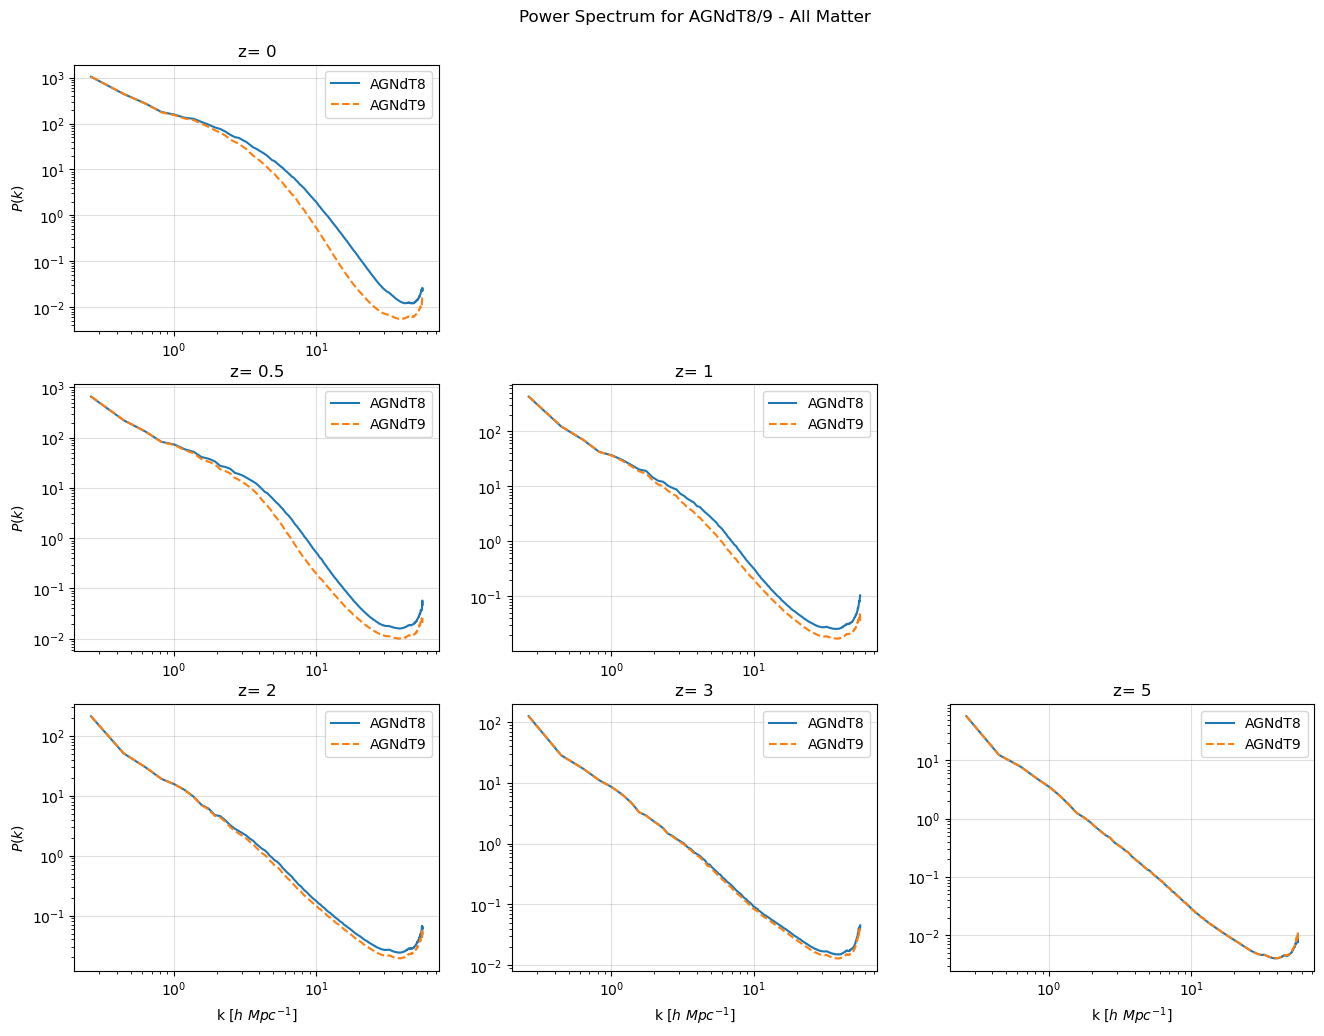

In [126]:
# creating triangular plot for Pk 
# DM only
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$P(k)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_Pk[z][0][0][0][:-2],Master_Pk[z][0][0][1][:-2], label='AGNdT8')
            ax[i,j].loglog(Master_Pk[z][0][1][0][:-2],Master_Pk[z][0][1][1][:-2], ls='--', label='AGNdT9')
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('k $[h~ Mpc^{-1} ]$')
ax[0,1].set_title('Power Spectrum for AGNdT8/9 - DM\n\n');
plt.savefig('AGNdT8_9_Pk_DM.jpg', dpi=300, bbox_inches='tight')

# Gas only
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$P(k)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_Pk[z][1][0][0][:-2],Master_Pk[z][1][0][1][:-2], label='AGNdT8')
            ax[i,j].loglog(Master_Pk[z][1][1][0][:-2],Master_Pk[z][1][1][1][:-2], ls='--', label='AGNdT9')
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('k $[h~ Mpc^{-1} ]$')
ax[0,1].set_title('Power Spectrum for AGNdT8/9 - Gas\n\n');
plt.savefig('AGNdT8_9_Pk_gas.jpg', dpi=300, bbox_inches='tight')

# All Matter
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$P(k)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_Pk[z][1][0][0][:-2],Master_Pk[z][1][0][1][:-2], label='AGNdT8')
            ax[i,j].loglog(Master_Pk[z][1][1][0][:-2],Master_Pk[z][1][1][1][:-2], ls='--', label='AGNdT9')
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('k $[h~ Mpc^{-1} ]$')
ax[0,1].set_title('Power Spectrum for AGNdT8/9 - All Matter\n\n');
plt.savefig('AGNdT8_9_Pk_AM.jpg', dpi=300, bbox_inches='tight')

# Now we compare the same between ViscHi and ViscLo.

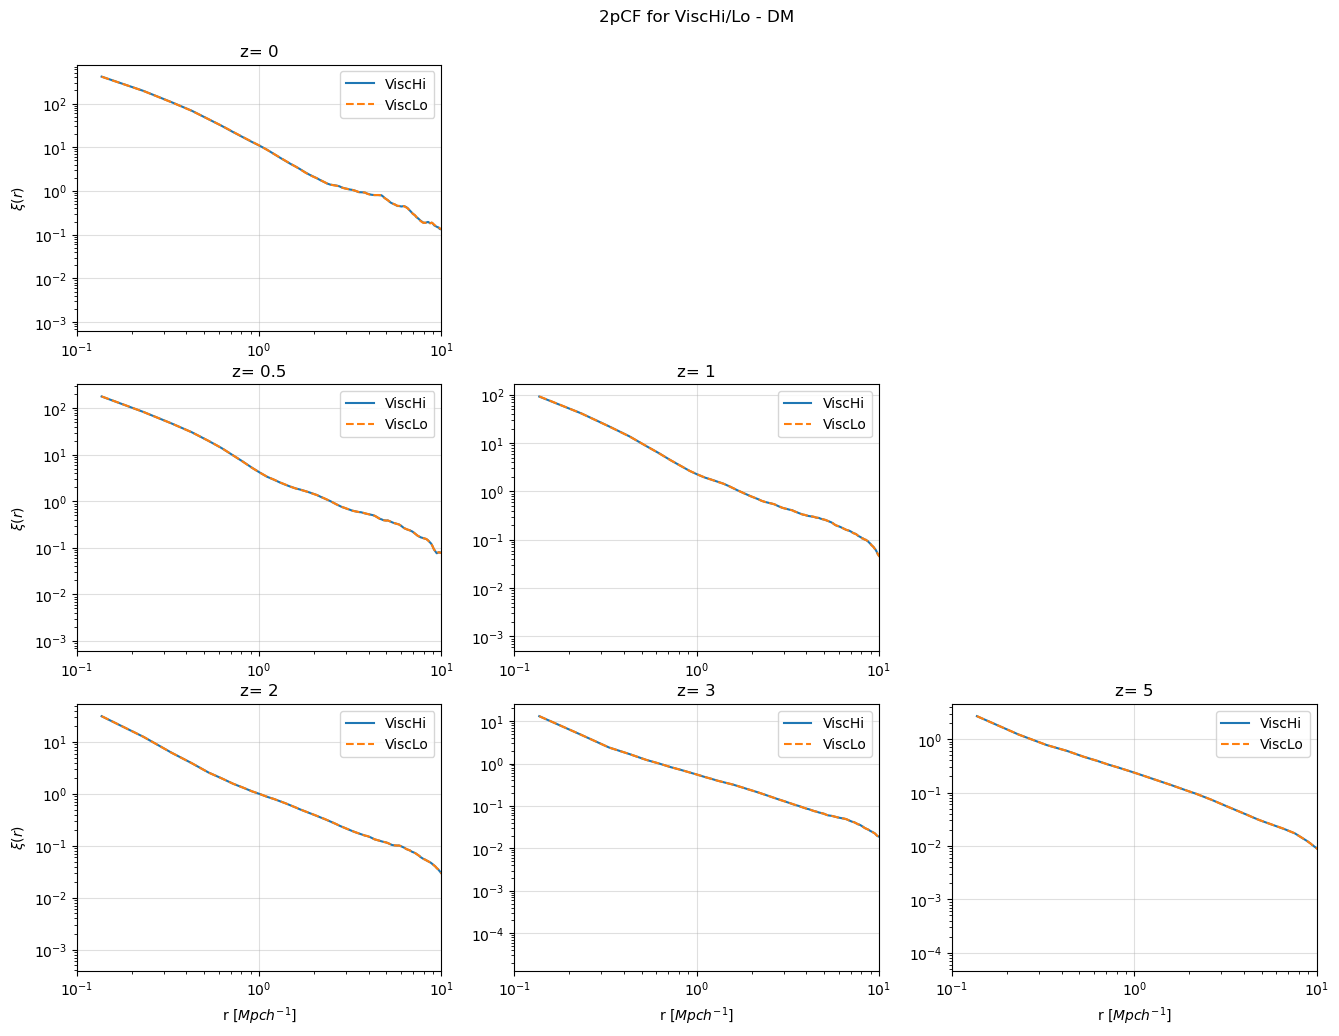

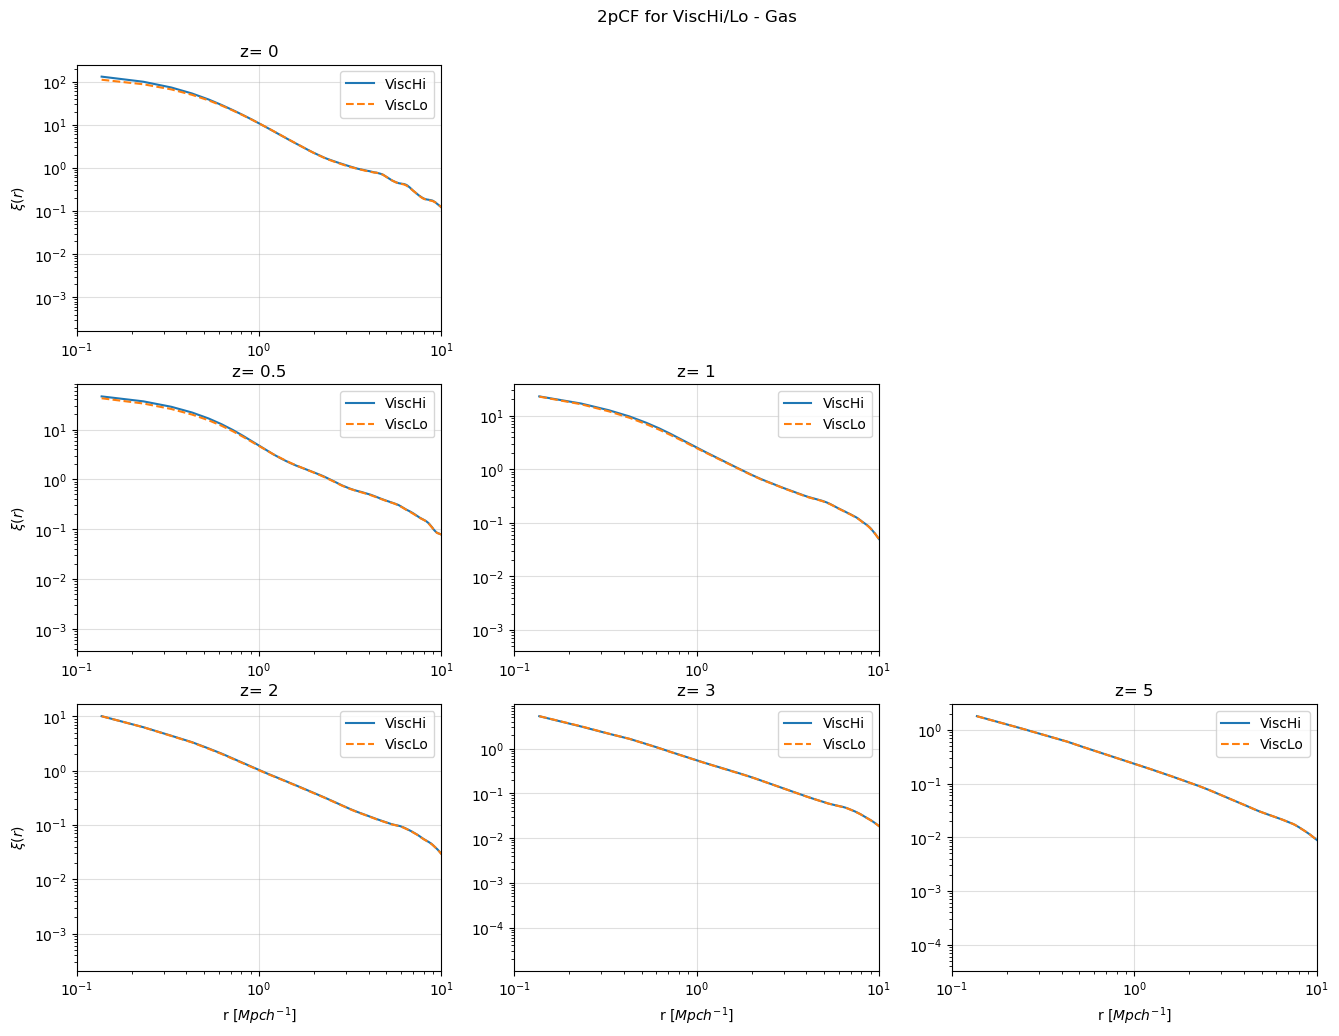

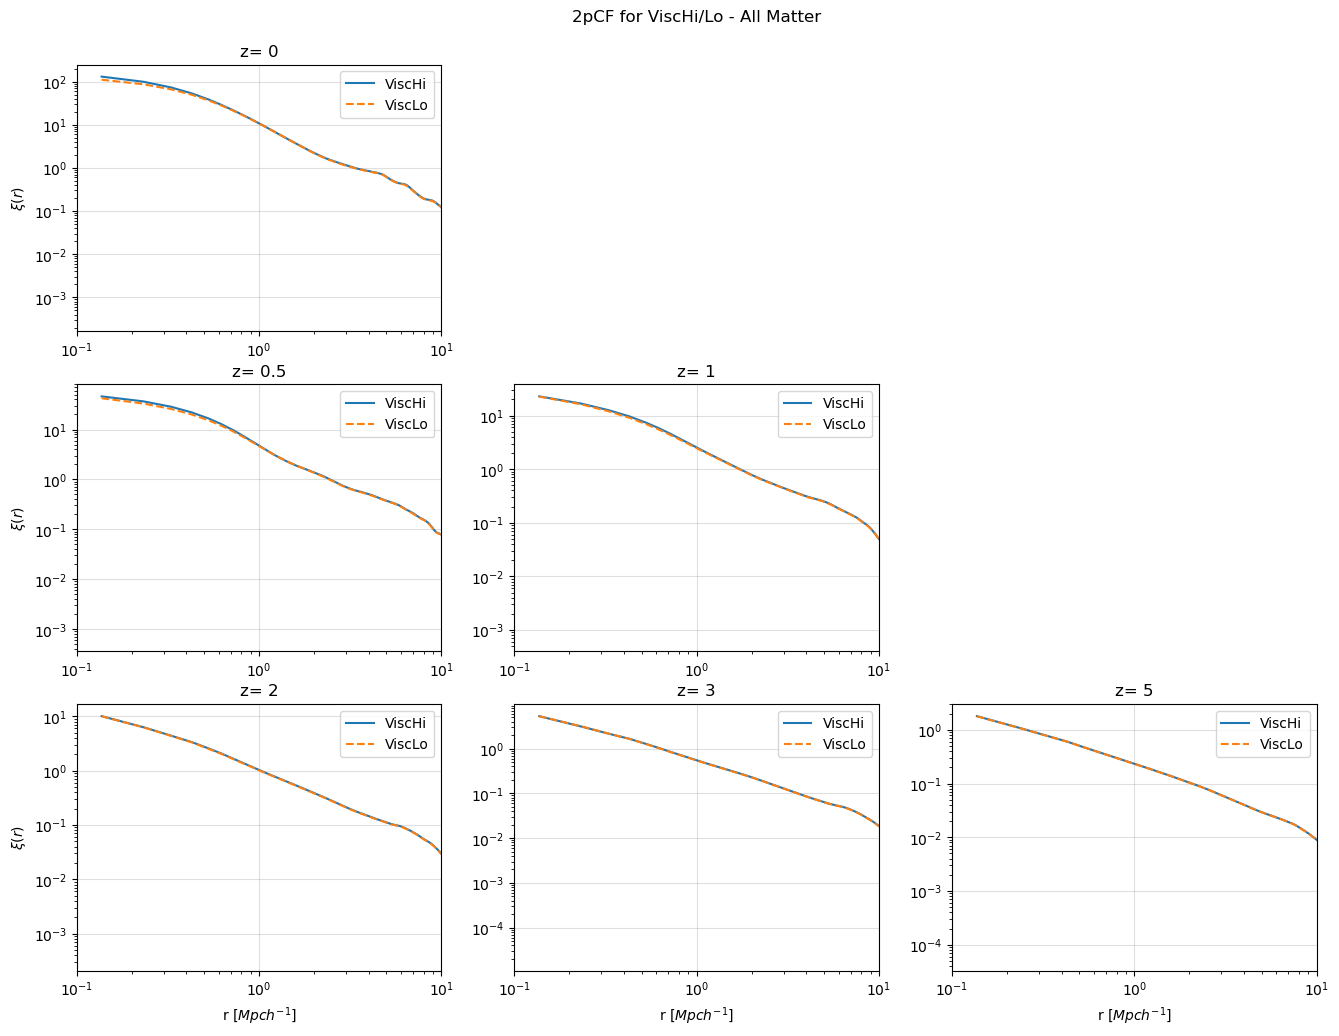

In [127]:
# creating triangular plot for 2pCF 
# DM only
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$\\xi (r)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_2pCF[z][0][2][0][:-2],Master_2pCF[z][0][2][1][:-2], label='ViscHi')
            ax[i,j].loglog(Master_2pCF[z][0][3][0][:-2],Master_2pCF[z][0][3][1][:-2], ls='--', label='ViscLo')
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_xlim(1e-1, 1e1);
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('r $[Mpc h^{-1} ]$')
ax[0,1].set_title('2pCF for ViscHi/Lo - DM\n\n');
plt.savefig('ViscHi-Lo_2pCF_DM.jpg', dpi=300, bbox_inches='tight')

# Gas only
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$\\xi (r)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_2pCF[z][1][2][0][:-2],Master_2pCF[z][1][2][1][:-2], label='ViscHi')
            ax[i,j].loglog(Master_2pCF[z][1][3][0][:-2],Master_2pCF[z][1][3][1][:-2], ls='--', label='ViscLo')
            ax[i,j].legend()
            ax[i,j].set_xlim(1e-1, 1e1)
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('r $[Mpc h^{-1} ]$')
ax[0,1].set_title('2pCF for ViscHi/Lo - Gas\n\n');
plt.savefig('ViscHi-Lo_2pCF_gas.jpg', dpi=300, bbox_inches='tight')

# All Matter
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$\\xi(r)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_2pCF[z][1][2][0][:-2],Master_2pCF[z][1][2][1][:-2], label='ViscHi')
            ax[i,j].loglog(Master_2pCF[z][1][3][0][:-2],Master_2pCF[z][1][3][1][:-2], ls='--', label='ViscLo')
            ax[i,j].legend()
            ax[i,j].set_xlim(1e-1, 1e1)
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('r $[Mpc h^{-1} ]$')
ax[0,1].set_title('2pCF for ViscHi/Lo - All Matter\n\n');
plt.savefig('ViscHi-Lo_2pCF_AM.jpg', dpi=300, bbox_inches='tight')

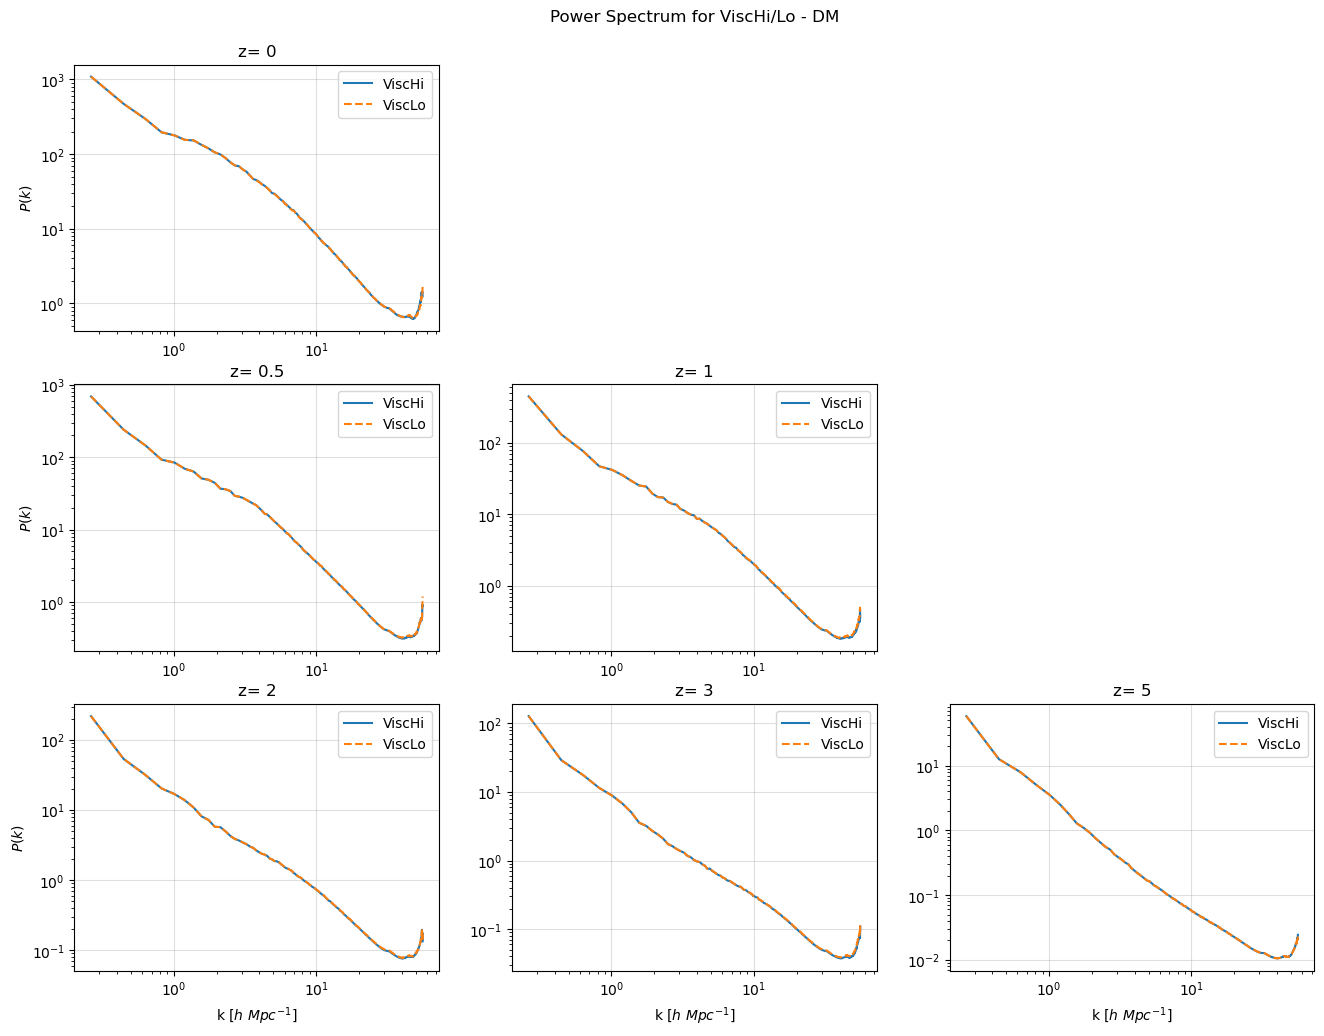

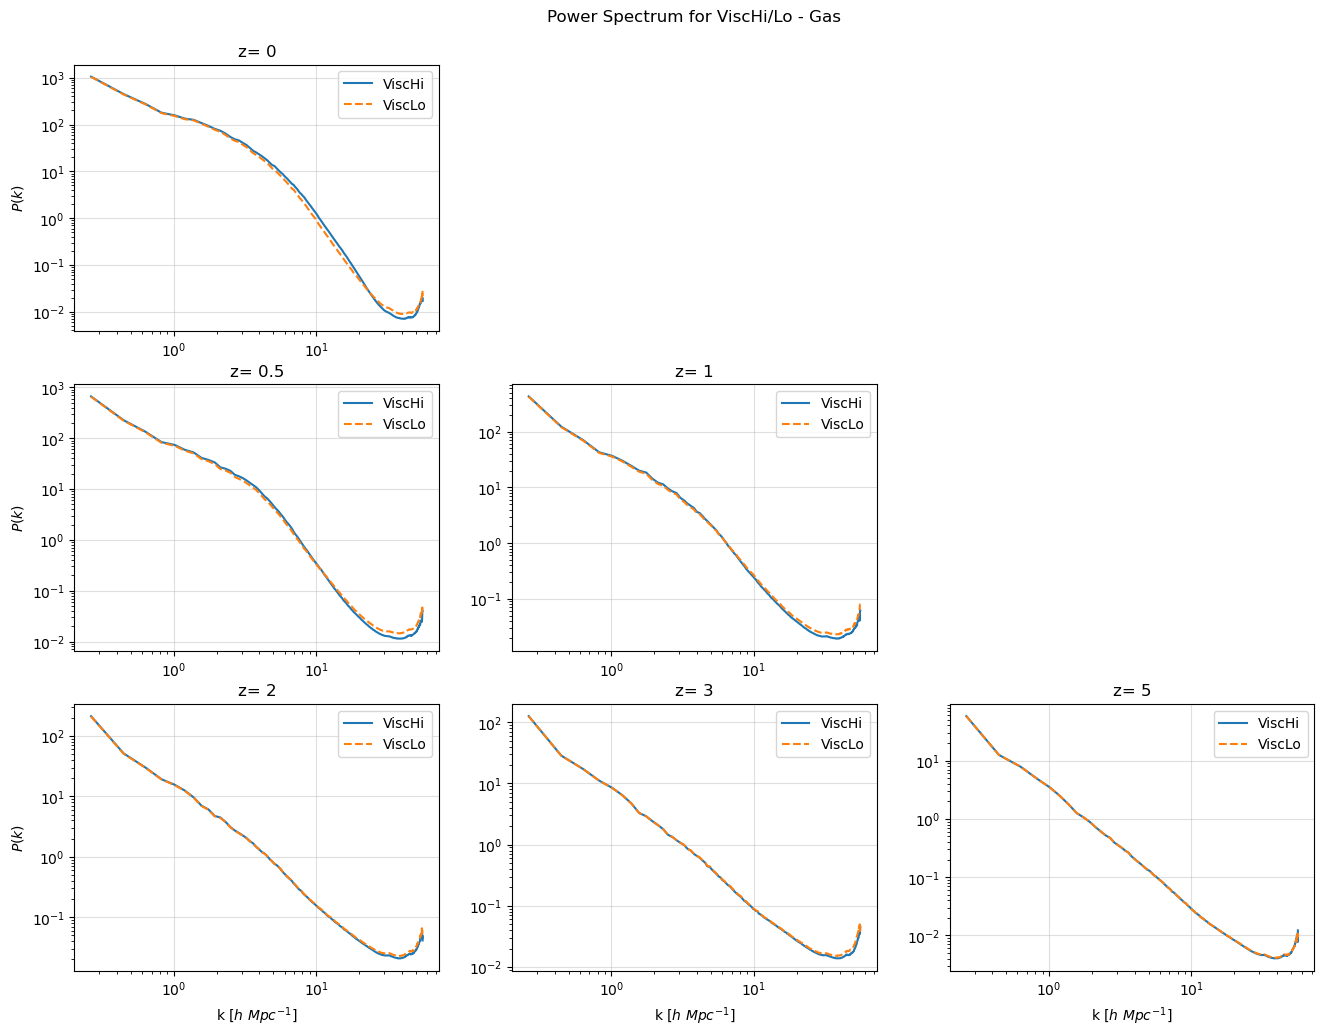

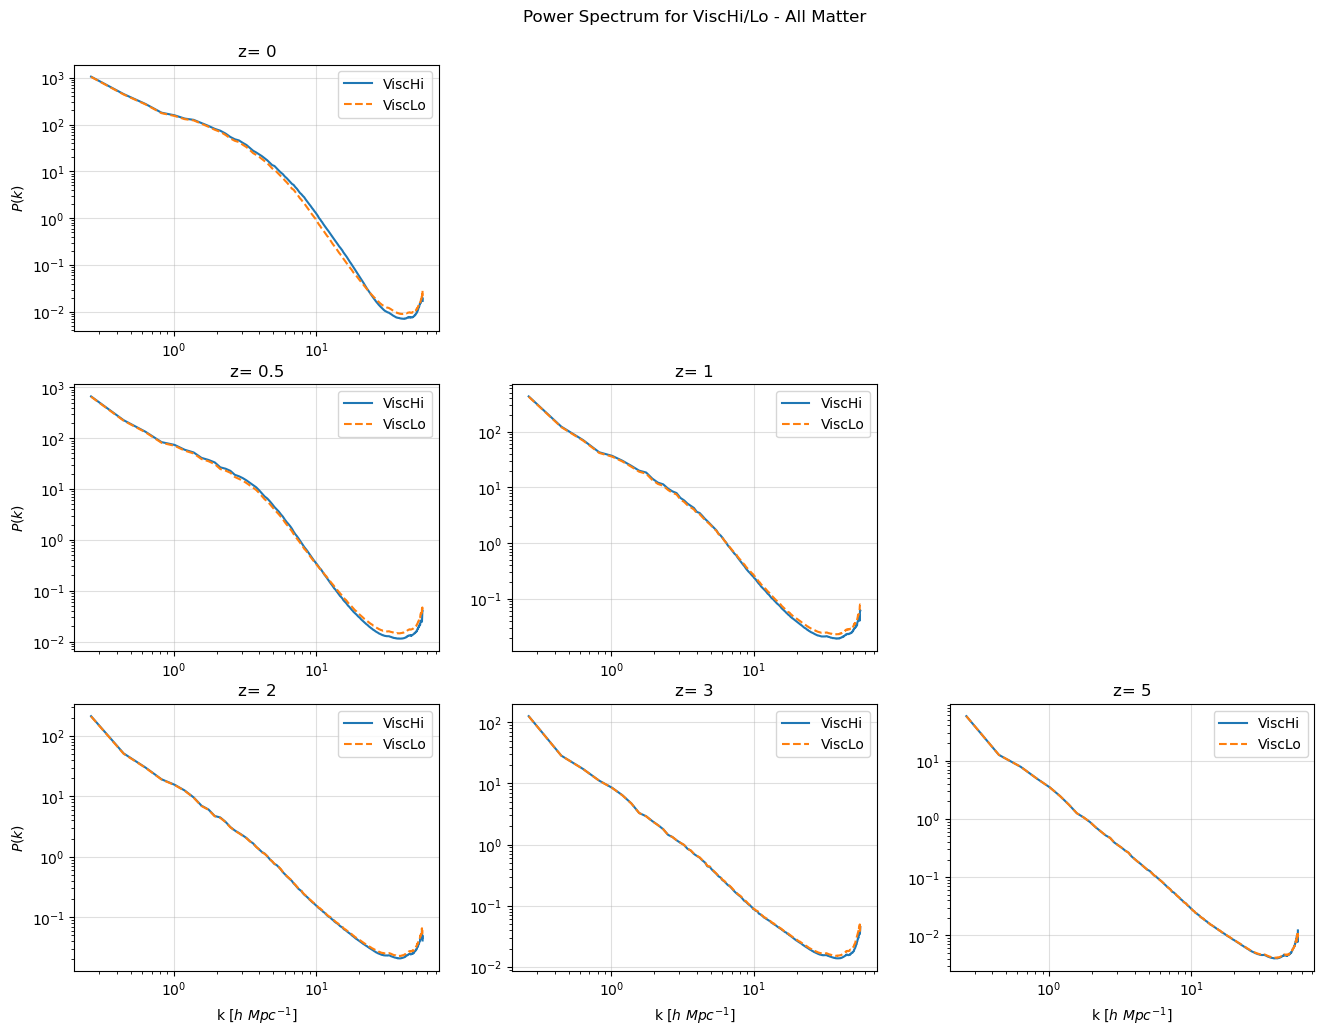

In [128]:
# creating triangular plot for Pk 
# DM only
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$P(k)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_Pk[z][0][2][0][:-2],Master_Pk[z][0][2][1][:-2], label='ViscHi')
            ax[i,j].loglog(Master_Pk[z][0][3][0][:-2],Master_Pk[z][0][3][1][:-2], ls='--', label='ViscLo')
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('k $[h~ Mpc^{-1} ]$')
ax[0,1].set_title('Power Spectrum for ViscHi/Lo - DM\n\n');
plt.savefig('ViscHi-Lo_Pk_DM.jpg', dpi=300, bbox_inches='tight')

# Gas only
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$P(k)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_Pk[z][1][2][0][:-2],Master_Pk[z][1][2][1][:-2], label='ViscHi')
            ax[i,j].loglog(Master_Pk[z][1][3][0][:-2],Master_Pk[z][1][3][1][:-2], ls='--', label='ViscLo')
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('k $[h~ Mpc^{-1} ]$')
ax[0,1].set_title('Power Spectrum for ViscHi/Lo - Gas\n\n');
plt.savefig('ViscHi-Lo_Pk_gas.jpg', dpi=300, bbox_inches='tight')

# All Matter
fig, ax = plt.subplots(3,3, figsize=(16,12), dpi=100)
z = 0
for i in range(3):
    ax[i,0].set_ylabel('$P(k)$')
    for j in range(3):
        if i<j:
            ax[i,j].axis('off')
        else:
            ax[i,j].loglog(Master_Pk[z][1][2][0][:-2],Master_Pk[z][1][2][1][:-2], label='ViscHi')
            ax[i,j].loglog(Master_Pk[z][1][3][0][:-2],Master_Pk[z][1][3][1][:-2], ls='--', label='ViscLo')
            ax[i,j].legend()
            ax[i,j].grid(alpha=0.4)
            ax[i,j].set_title('z= '+str(z_vals[z]))
            z += 1
        if i==2:
            ax[i,j].set_xlabel('k $[h~ Mpc^{-1} ]$')
ax[0,1].set_title('Power Spectrum for ViscHi/Lo - All Matter\n\n');
plt.savefig('ViscHi-Lo_Pk_AM.jpg', dpi=300, bbox_inches='tight')